<a href="https://colab.research.google.com/github/Glebushkina/intro_BHS_AI/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22intro_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Привет уважаемый соискатель!
 Тебе предстоит пройти пару простых заданий по глубокому обучению. Это нормально не всегда понимать сразу как
 сделать ту или иную часть, видь у тебя есть возможность разобраться во всём самому! А этот навык куда ценнее
 знаний.
 Отметим сразу, что весь код написанный нами, есть лишь один из возможных путей решения задачи и ты не обязан ему
 следовать. Возможно, ты решишь использовать другие, более удобные, решения. Но как и в случае использования
 наших подсказок, так и без них, мы рекомендуем понимать, что ты пишешь и зачем. Мы будем спрашивать на собесе!
 Но ты не пугайся) Лучше разберись что и как.

In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset
import torch.nn as nn
from tqdm import tqdm

# Задания и оценивание
В тестировании присутствует 3 части:
- Составление датаеста
- Конструкция архитектуры нейросети
- Обучение и аналитика

Каждая из них представляет собой важный этап работы Ml-щика нашей команды, поэтому постарайся сделать их все.
Все они приносят равное количество баллов. В каждой части есть задание со звёздочкой, его делать не обязательно -
 но если ты всё-таки его сделаешь, то это поможет нам оценить твои компетенции.


Скажем пару слов о данных. Признаки представляют из себя из себя 11 непрерывных переменных, таргет - целочисленную оценку от 1 до 10. Подумай, что это за тип задачи.

тип задачи - классификация с порядковым типом целевой переменной. отличается от обычной классификации тем, что ошибка между 9 и 10 меньше, чем ошибка между 1 и 10. в обычной классификации ошибка между 1 и 10 = ошибке между 10 и 9. то есть важен не только сам факт ошибки, но и величина ошибки.
такую задачу можно решить методом ординарной логистической регрессии, когда мы предсказываем не число, а вероятность попадания в категорию. то есть задача сводится к тому, что мы предсказываем: значение >1? если да, то >2? и тд. таким образом, результат классификации - предсказание вероятности перейти через порог.

In [ ]:
def seed_everything(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

seed_everything(123456)

# Составление датаеста

- Загрузи данные из файла our data. (тут тебе может помочь библиотека pandas)
- Раздели их по переменным X и Y.
- Сконструируй класс MyDataset. (про такого функионал класса можешь почитать [тут](https:pytorch.org/tutorials/beginner/basics/data_tutorial.html))

- "*" Импортируй линейную регрессию из библиотеки sklearn и обучи её на тех же данных. Ура! теперь у нас есть безлайн!


Загрузите данные и разделите на X, Y

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Копия my_data.csv', sep=";")
X = data.drop(columns=['target']).values
Y = data['target'].values

In [ ]:
data

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,target
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Создайте класс DataSet - https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [ ]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x) # количество выборок в нашем наборе данных

    def __getitem__(self, idx):
      # возвращает выборку из набора данных с заданным индексом
      x = torch.tensor(self.x[idx], dtype=torch.float32)
      y = torch.tensor(self.y[idx], dtype=torch.long)
      return x, y

Импортируй линейную регрессию из библиотеки sklearn и обучи её на тех же данных

Для начала разделим данные на тестовую выборку и обучающую:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True) #параметр shuffle перемешивает данные

Теперь масштабируем данные:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print('До масштабирования: ',X_train.mean(axis=0))
print('После масштабирования: ',X_train_scaled.mean(axis=0))

До масштабирования:  [ 8.31274433  0.52611415  0.27022674  2.49761532  0.08662705 15.81196247
 46.04300235  0.99671941  3.31397185  0.66028929 10.44452697]
После масштабирования:  [-2.99838340e-15  5.28106791e-15 -8.02936902e-16 -2.33711061e-15
  9.77849111e-15 -8.12485341e-17  4.85234301e-17 -1.29673112e-12
 -2.67602811e-14  2.64474395e-15  7.40420669e-15]


Теперь можно создать безлайн

In [ ]:
from sklearn.linear_model import LinearRegression
# Шаг 1. создание модели
model = LinearRegression()

# Шаг 2. обучение модели
model.fit(X_train, y_train)

# Шаг 3. предсказание на тестовых данных
y_pred = model.predict(X_test)

Надо округлить значения, так как у нас y - целые числа от 0 до 10

In [ ]:
import numpy as np
y_pred_rounded = np.clip(np.round(y_pred), 1, 10)
y_pred_rounded

array([6., 6., 5., 5., 6., 5., 5., 6., 6., 5., 6., 6., 6., 5., 6., 6., 5.,
       6., 6., 6., 5., 6., 5., 5., 5., 6., 6., 5., 6., 5., 6., 6., 6., 6.,
       5., 5., 5., 5., 6., 5., 5., 5., 5., 6., 6., 6., 6., 5., 6., 5., 6.,
       6., 5., 7., 6., 5., 6., 5., 5., 6., 6., 6., 5., 5., 6., 6., 5., 5.,
       5., 6., 5., 5., 6., 6., 5., 6., 5., 6., 5., 5., 5., 5., 6., 5., 5.,
       6., 6., 5., 5., 5., 6., 6., 5., 5., 5., 6., 6., 5., 5., 5., 6., 5.,
       5., 5., 5., 6., 5., 5., 5., 6., 6., 5., 5., 6., 5., 5., 5., 5., 5.,
       5., 6., 7., 5., 6., 5., 5., 5., 5., 6., 6., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 6., 6., 6., 5., 6., 5., 6., 6., 6., 5., 5., 5., 5.,
       5., 6., 6., 6., 6., 6., 6., 6., 5., 5., 6., 6., 6., 6., 5., 6., 5.,
       6., 6., 5., 6., 6., 5., 6., 6., 6., 5., 7., 7., 5., 5., 6., 5., 4.,
       6., 6., 6., 6., 5., 6., 6., 5., 5., 6., 6., 6., 5., 6., 5., 5., 6.,
       6., 6., 5., 5., 5., 6., 5., 6., 6., 5., 5., 5., 5., 5., 5., 5., 5.,
       7., 5., 7., 5., 6.

Оценим модель

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred_rounded)
print(f'MAE на тесте {mae:.2f}', end='\n\n')

MAE на тесте 0.47



# Сконструируйте класс нейронной сети
В этом задании тебе предстоит сконструировать полносвязную двухслойную нейронную сеть.

- Вспомните какие сущности необходимы для обучения нейронной сети и включите их в атрибуты класса.
- Основываясь на типе данной задачи выберете подходящую лосс функцию.
- На основе требований первых двух пунктов заполните методы forward и training_step
- "*" Настрой обучение батчами (это не обязательно делать в противном случае)

Напоминаем, что не обязательно пользоваться предлагаемым шаблоном! Если вы знаете более быстрые и простые пути,
то будет интересно на них посмотреть.

In [ ]:
class MyNet(nn.Module):
    def __init__(self, hidden_size = 62):
        super().__init__()
        self.fc1 = nn.Linear(11, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 9)
        self.register_buffer('buffer', torch.arange(1,10))
        #self.optimizer = torch.optim.Adam
        #self.loss = nn.BCELoss()

    def forward(self, x):
        """
        Прямой проход по всем слоям сети для получения предсказания.
        :param x:
        Входящие данные.
        :return:
        Предсказанные значения для входящих данных.
        """
        if x.dim() == 1:
            x = x.unsqueeze(0)
        x = torch.relu(self.fc1(x))
        score = self.fc2(x)
        logits = score - self.buffer
        probabilities = torch.sigmoid(logits)
        return probabilities

    def training_step(self, train_data, optimizer, loss_fn):
        """
        Реализация одного шага обучения.
        :param train_data:
        Данные для прохода.
        :return:
        Значение лосс функции этого шага обучения.
        """
        X_train, y_train = train_data

        # обнуляем градиенты оптимизатора, чтобы не было суммирования градиентов
        optimizer.zero_grad()

        # получаем вероятности
        probabilities = self.forward(X_train) #результат: матрица[batch_size, 9]

        # подготовка targets (нужны бинарные векторы)
        batch_size = y_train.shape[0]

        # создаем тензор целевых переменных той же формы, что и вероятности
        targets = torch.zeros(batch_size, 9, device=y_train.device)

        # заполняем единицами для порогов ниже оценки
        for i in range(batch_size):
            rating = int(y_train[i].item())
            if rating > 1:
                targets[i, :rating-1] = 1.0

        # вычисление функции потерь
        loss = loss_fn(probabilities, targets)

        # обратное распространение ошибки
        # вычисление градиентов
        loss.backward()

        # обновление весов
        optimizer.step()

        return loss.item()

    def predict_rating(self, x):
        probabilities = self.forward(x)
        ratings = (probabilities > 0.5).sum(dim=1) + 1 # dim=1 сумма по столбцам
        return ratings

# Обучение и аналитика
В этом задании тебе предстоит обучить сконструированную архитектуру.

- Создай объект класса MyDataset и MyNet, а также других атрибутов, если ваше решение их предусматривает.
- Напишите цикл обучения нейронной сети.
- Обучите нейронную сеть и оцените финальной качество на валидационном датасете.
- "*" Каждый N-ый шаг изображайте на графике, как менялось значение лосс функции на тестовых данных и
на части валидационных данных.

In [ ]:
from torch.utils.data import DataLoader
import torch.optim as optim

In [ ]:
train_dataset = MyDataset(X_train_scaled, y_train)
test_dataset = MyDataset(X_test_scaled, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = MyNet(hidden_size=62)

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.BCELoss()

In [ ]:
num_epochs = 20

train_losses = []
val_losses = []
epochs_list = []

for epoch in range(num_epochs):
  model.train() # режим обучения (Dropout, Batch Normalization)

  total_train_loss = 0
  train_batches = 0

  # обучение на тренировочных данных
  for batch_idx, (x_batch, y_batch) in enumerate(train_loader):
    # один шаг обучения
    loss = model.training_step((x_batch, y_batch), optimizer, loss_fn)
    total_train_loss += loss
    train_batches += 1

  # средний loss за эпоху
  avg_train_loss = total_train_loss / train_batches
  train_losses.append(avg_train_loss)

  model.eval() # режим оценки
  val_running_loss = 0.0

  with torch.no_grad():
    for x_val, y_val in test_loader:
      probs = model(x_val)

      batch_size = y_val.shape[0]
      targets = torch.zeros(batch_size, 9)
      for i in range(batch_size):
        rating = int(y_val[i].item())
        if rating > 1:
          targets[i, :rating-1] = 1.0

      loss = loss_fn(probs, targets)
      val_running_loss += loss.item()

  avg_val_loss = val_running_loss / len(test_loader)
  val_losses.append(avg_val_loss)

  # выводим прогресс каждые 5 эпох
  if (epoch + 1) % 5 == 0:
    print(f'Эпоха [{epoch + 1}/{num_epochs}]')
    print(f'  Train Loss: {avg_train_loss:.4f}')
    print(f'  Val Loss: {avg_val_loss:.4f}')

print("Обучение завершено!")

Эпоха [5/20]
  Train Loss: 0.2355
  Val Loss: 0.2028
Эпоха [10/20]
  Train Loss: 0.1459
  Val Loss: 0.1445
Эпоха [15/20]
  Train Loss: 0.1313
  Val Loss: 0.1341
Эпоха [20/20]
  Train Loss: 0.1241
  Val Loss: 0.1283
Обучение завершено!


In [ ]:
import matplotlib.pyplot as plt

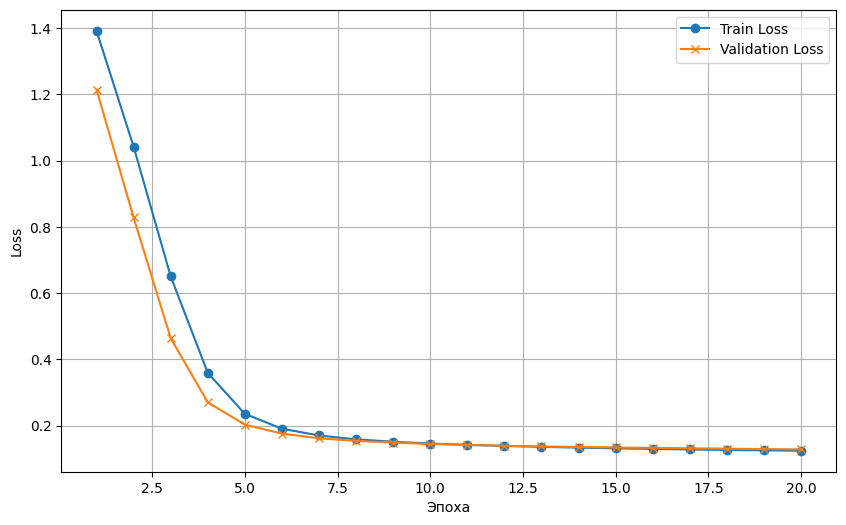

In [ ]:
# график
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', marker='x')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Не в зависимости от того что тебе удалось сделать , скажи пару слов о том, в чём ты смог разобраться (если такие открытия были) и о том, какие изменения / дополнения и почему ты привнёс в заготовленный нами шаблон.